In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [58]:
df = pd.read_csv(r'C:\Users\jaime\OneDrive\Documentos\Bootcamp\atp_tennis.csv', sep=";")
df.drop(["Odd_1", "Odd_2"], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,7-6 5-7 6-4


In [49]:
df["Winner"].value_counts()

Winner
Federer R.         0.019080
Nadal R.           0.016511
Djokovic N.        0.016030
Ferrer D.          0.011223
Murray A.          0.010891
                     ...   
Washington M.      0.000017
Clezar G.          0.000017
Lopez-Jaen M.A.    0.000017
Bogomolov Jr.A.    0.000017
Jelenic P.         0.000017
Name: proportion, Length: 1077, dtype: float64

In [1]:
df.describe()

NameError: name 'df' is not defined

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60325 entries, 0 to 60324
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tournament  60325 non-null  object        
 1   Date        60325 non-null  datetime64[ns]
 2   Series      60325 non-null  object        
 3   Court       60325 non-null  object        
 4   Surface     60325 non-null  object        
 5   Round       60325 non-null  object        
 6   Best of     60325 non-null  int64         
 7   Player_1    60325 non-null  object        
 8   Player_2    60325 non-null  object        
 9   Winner      60325 non-null  object        
 10  Rank_1      60325 non-null  int64         
 11  Rank_2      60325 non-null  int64         
 12  Pts_1       60325 non-null  int64         
 13  Pts_2       60325 non-null  int64         
 14  Score       60325 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 6.9+ MB


In [24]:
# print(df["Tournament"].unique())
print(df["Series"].unique())
# df["Court"].unique()
# df["Surface"].unique()

['International' 'Grand Slam' 'International Gold' 'Masters' 'Masters Cup'
 'ATP250' 'ATP500' 'Masters 1000']


In [42]:
torneos = ['Grand Slam', "Masters Cup", 'Masters 1000']
df_torneos = df[df["Series"].isin(torneos)]

df_torneos["Sets_Played"] = df_torneos["Score"].str.count("-")
df_torneos["Tie_Breaks"] = df_torneos["Score"].str.count("7-6") + df_torneos["Score"].str.count("6-7")
df_torneos.head()

C:\Users\jaime\AppData\Local\Temp\ipykernel_6472\688363874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_torneos["Sets_Played"] = df_torneos["Score"].str.count("-")
C:\Users\jaime\AppData\Local\Temp\ipykernel_6472\688363874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_torneos["Tie_Breaks"] = df_torneos["Score"].str.count("7-6") + df_torneos["Score"].str.count("6-7")


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Score,Sets_Played,Tie_Breaks
151,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Puerta M.,Agassi A.,Agassi A.,112,1,-1,-1,2-6 2-6 3-6,3,0
152,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Alami K.,Manta L.,Alami K.,35,107,-1,-1,6-4 7-6 7-5,3,1
153,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Alonso J.,Arazi H.,Arazi H.,111,41,-1,-1,3-6 6-7 2-6,3,1
154,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Behrend T.,Meligeni F.,Behrend T.,106,28,-1,-1,6-2 4-6 6-7 6-3 6-0,5,1
155,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Stoltenberg J.,Bjorkman J.,Bjorkman J.,81,76,-1,-1,7-6 4-6 4-6 6-0 4-6,5,1


In [26]:
df_torneos.describe()

,Best of,Rank_1,Rank_2,Pts_1,Pts_2,Number_Set,Tie_Breaks
count,19206.000000,19206.000000,19206.000000,19206.000000,19206.000000,19206.000000,19206.000000
mean,4.175674,60.011246,58.882224,1722.487868,1736.025825,3.146829,0.533011
std,0.984474,77.556966,74.151657,2354.704514,2375.048101,0.936904,0.706888
min,3.000000,1.000000,1.000000,-1.000000,-1.000000,2.000000,0.000000
25%,3.000000,15.000000,15.000000,487.000000,495.000000,2.000000,0.000000
50%,5.000000,40.000000,40.000000,935.000000,951.000000,3.000000,0.000000
75%,5.000000,79.750000,79.000000,1855.000000,1880.750000,4.000000,1.000000
max,5.000000,1441.000000,1415.000000,16950.000000,16950.000000,5.000000,4.000000


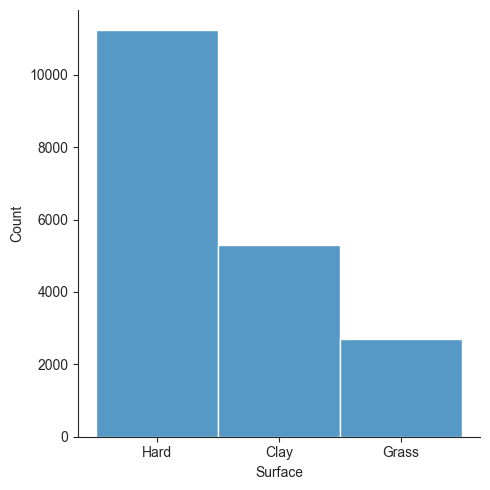

In [27]:
sns.set_style("ticks")

x_values = df_torneos['Surface']
sns.displot(x_values);
